In [73]:
import pandas as pd
import numpy as np
import random as rnd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.utils import np_utils
N1 = 12
N2 = 26
N3 = 9

In [74]:
data = pd.read_csv("WIG_20_lat.csv",usecols = ['Ostatnio'])
data.head()

,Ostatnio
0,"1.601,91"
1,"1.626,10"
2,"1.605,12"
3,"1.573,44"
4,"1.640,06"


In [75]:
output_ema_12 = []
output_ema_26 = []

In [76]:
alpha_ema_12 = 2/(N1+1)
alpha_ema_26 = 2/(N2+1)
alpha_signal = 2/(N3+1)
const_ema_12 = 0
const_ema_26 = 0
const_signal = 0
input = []
#preprocessing
for i in range(data.size):
    str = data.iloc[i,0]
    str = str.replace('.','')
    str = str.replace(',','.')
    input.append(float(str))
input.reverse()
#calculating bottom for ema12
for i in range(13):
    const_ema_12 = const_ema_12 + (1 - alpha_ema_12)**i
#calculating bottom for ema12
for i in range(27):
    const_ema_26 = const_ema_26 + (1 - alpha_ema_26)**i
#calculating bottom for SIGNAL
for i in range(10):
    const_signal = const_signal + (1 - alpha_signal)**i

In [77]:
for i in range(14,len(input)-12):
    sum = 0
    for j in range(13):
        sum = input[j+i]*(1-alpha_ema_12)**j + sum
    sum = sum / const_ema_12
    output_ema_12.append(sum)
    
for i in range(len(input)-26):
    sum = 0
    for j in range(27):
        sum = input[j+i]*(1-alpha_ema_26)**j + sum
    sum = sum / const_ema_26
    output_ema_26.append(sum)
MACD = []
SIGNAL = []
for i in range(len(input)-26):
    MACD.append(output_ema_12[i]-output_ema_26[i])
for i in range(len(MACD)-9):
    sum = 0
    for j in range(10):
        sum = MACD[j+i]*(1-alpha_signal)**j + sum
    sum = sum / const_signal
    SIGNAL.append(sum)

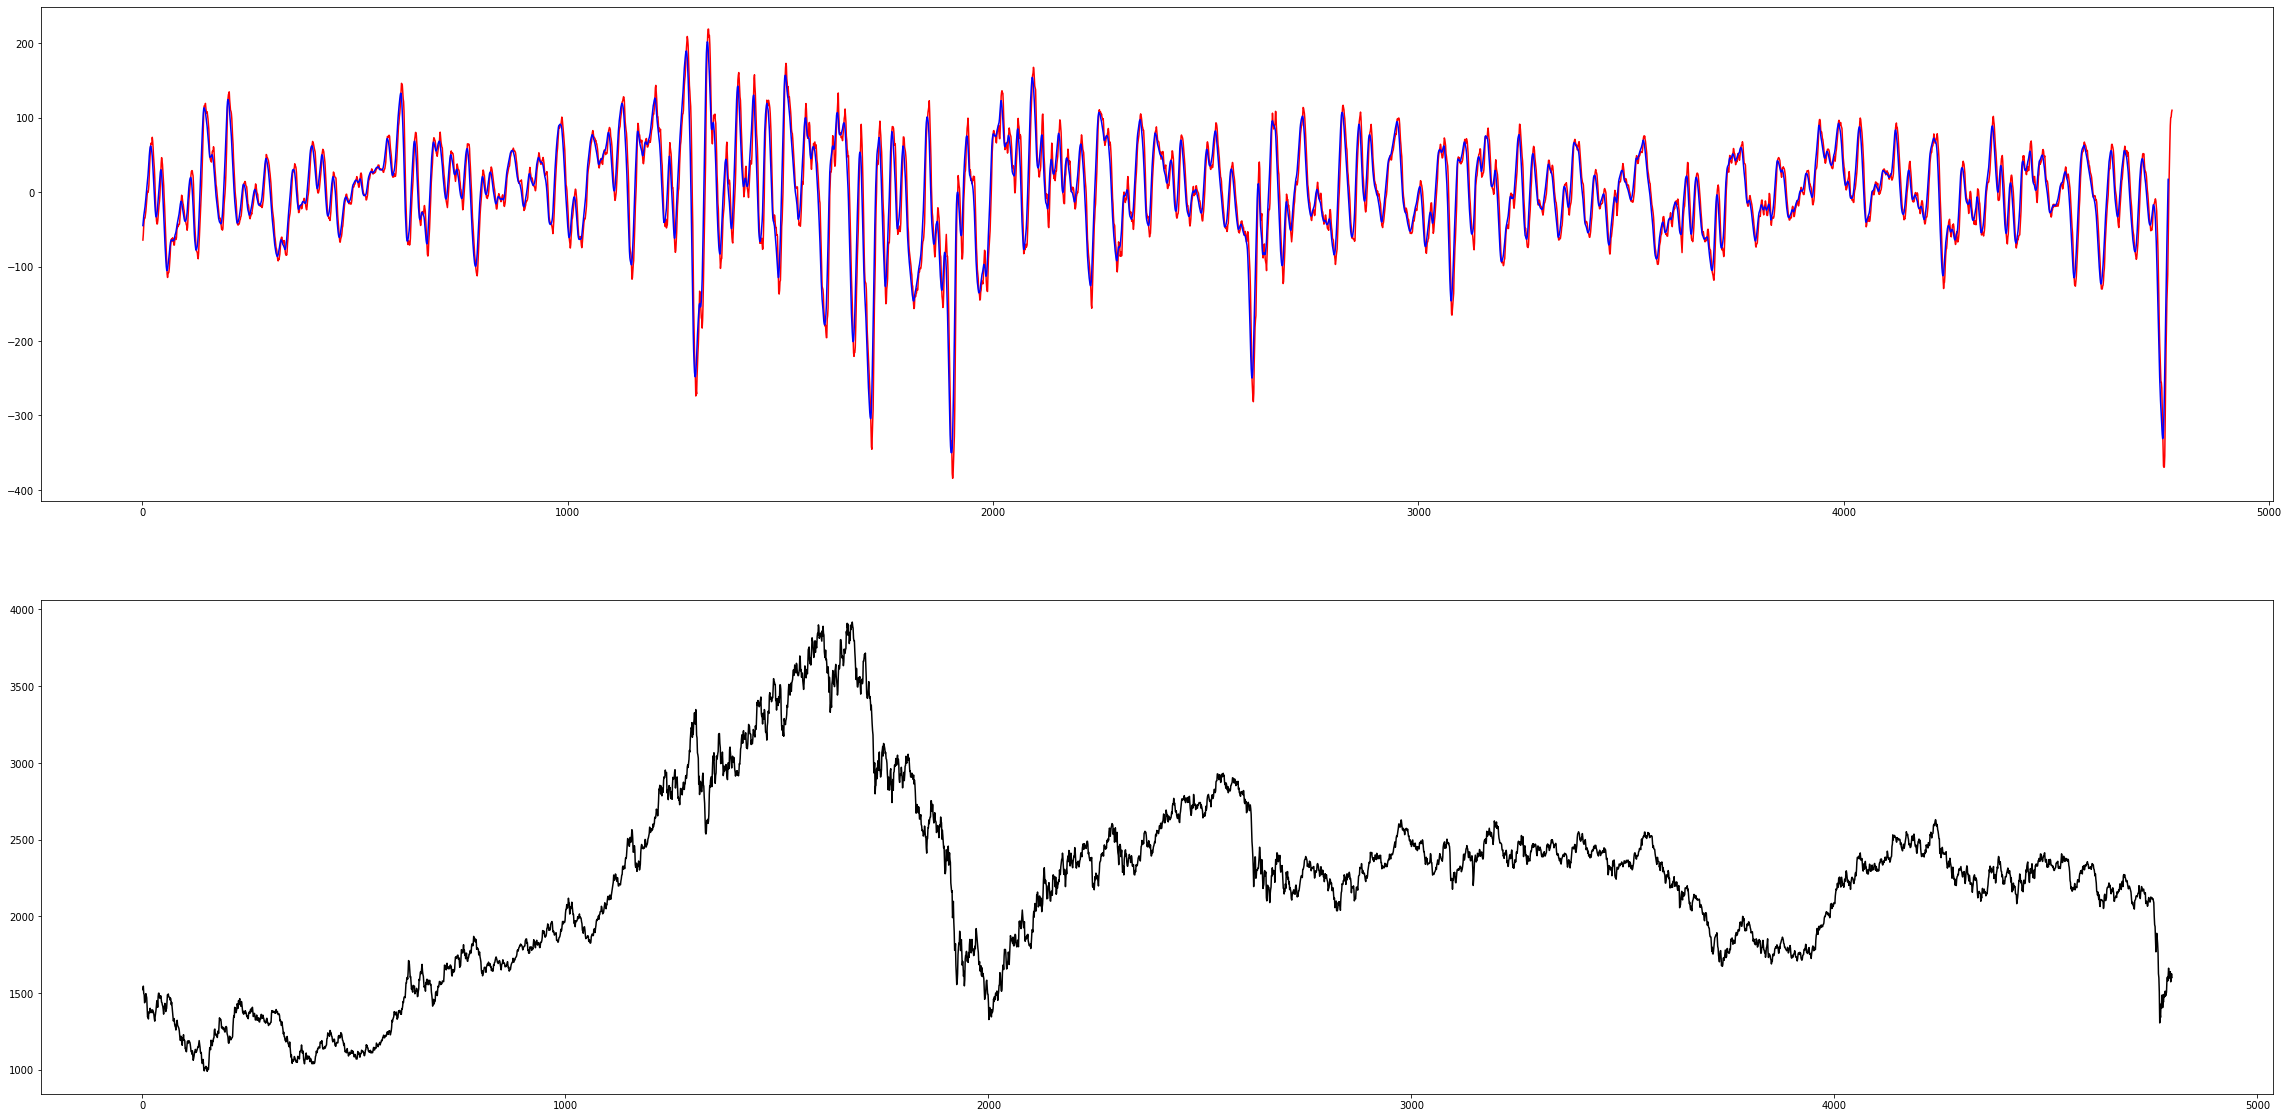

<Figure size 432x288 with 0 Axes>

In [78]:
x1 = np.linspace(1.0,len(MACD),num = (len(MACD)))
x2 = np.linspace(1.0,len(MACD)-9,num = (len(MACD)-9))
x3 = np.linspace(1.0,len(input),num = (len(input)))
#scaled_MACD = [a+b for a,b in zip(MACD,4*np.ones(len(MACD)))]
plt.figure(num = None, figsize = (40,20))
plt.subplot(211)
plt.plot(x1, MACD, color="red")
plt.plot(x2, SIGNAL, color ="blue")
plt.subplot(212)
plt.plot(x3, input, color="black")
plt.show()
plt.savefig("MACD_SIGNAL_raw_Input.png")

In [79]:
print(len(input))

4798


In [80]:

flag_MACD = False
flag_SIGNAL = False
money = []
money.append(10000)
shares = []
shares.append(0)
if MACD[0] > SIGNAL[0]:
    flag_MACD = True
    MACD_units = 4
    SIGNAL_units = 0
else:
    flag_SIGNAL = True
    SIGNAL_units = 4
    MACD_units = 0
for i in range(1,len(MACD) - 9 ):
    if MACD[i] > SIGNAL[i] and flag_SIGNAL and SIGNAL_units > 3:
      #buy
        shares.append(shares[-1] + int(money[-1]/input[i]))
        money.append(money[-1] - int(money[-1]/input[i])*input[i])
        flag_MACD = True
        flag_SIGNAL = False
        SIGNAL_units = 0
        MACD_units = 0
    if SIGNAL[i] > MACD[i] and flag_MACD and MACD_units > 3:
      #sell
        money.append(money[-1] + shares[-1]*input[i])
        shares.append(0)
        flag_SIGNAL = True
        flag_MACD = False
        MACD_units = 0
        SIGNAL_units =0
    if flag_MACD:
        MACD_units += 1
    if flag_SIGNAL:
        SIGNAL_units +=1

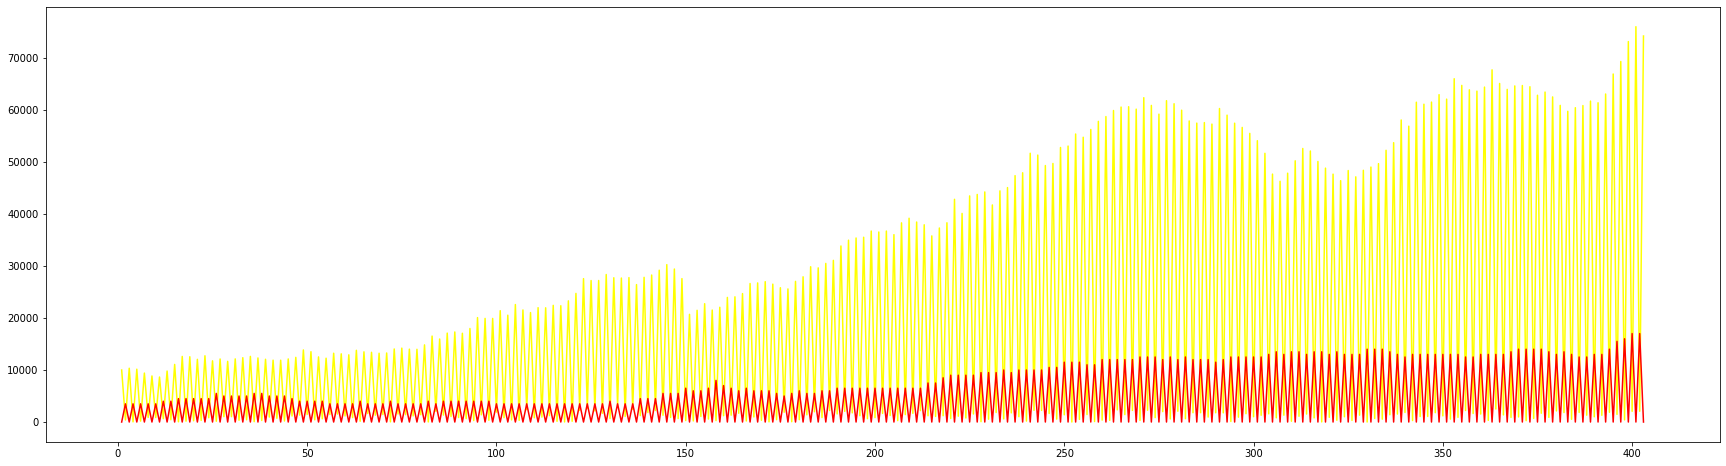

Money:  74189.09000000011
Shares:  0.0
Total Value:  74189.09000000011


<Figure size 432x288 with 0 Axes>

In [81]:
x = np.linspace(1,len(money),len(money))
#przeskalowanie shares
for i in range(len(shares)):
    shares[i] = 500*shares[i]
plt.figure(num=None,figsize=(30,8))
plt.plot(x, money,color="yellow")
plt.plot(x,shares,color="red")
plt.show()
plt.savefig("money_and_shares.png")
print("Money: ",money[-1])
print("Shares: ",shares[-1]/500)
print("Total Value: ",money[-1] + (shares[-1]/500)*input[len(MACD)-9])

In [82]:
data = pd.read_csv("WIG_20_lat.csv",usecols = ['Ostatnio'])
data.head()

,Ostatnio
0,"1.601,91"
1,"1.626,10"
2,"1.605,12"
3,"1.573,44"
4,"1.640,06"


In [83]:
input = []
sample_list = []
#preprocessing
for i in range(data.size):
    str = data.iloc[i,0]
    str = str.replace('.','')
    str = str.replace(',','.')
    input.append(float(str))
input.reverse()

In [84]:
#Preproccesing inputu 
MACD_list = []
SIGNAL_list = []
size_sample = 20
for i in range(len(SIGNAL)-size_sample):
    list_tem = []
    for j in range(size_sample+1):
        list_tem.append(SIGNAL[i+j])
    SIGNAL_list.append(list_tem)
    
for i in range(len(SIGNAL)-size_sample):
    list_tem = []
    for j in range(size_sample+1):
        list_tem.append(MACD[i+j])
    MACD_list.append(list_tem)
    
for i in range(len(SIGNAL)-size_sample):
    list_tem = []
    for j in range(size_sample+1):
        list_tem.append(input[i+j])
    sample_list.append(list_tem)

In [85]:
#Finding y_train ALGOy

y = []
up = 2
down = 0
no_change = 1
days_remote = 3
for i in range(len(sample_list)):
    if input[i+size_sample+days_remote]/input[i+size_sample]*100 > 100:
        y.append(up)
    #elif input[i+size_sample+days_remote]/input[i+size_sample]*100 > 100:
     #   y.append(no_change)
    else:
        y.append(down)
        
#usunac
#y = np.ones(len(sample_list))
#
y = np_utils.to_categorical(y, 3)
cv_set_y = []
cv_set_x = []
test_set_y = []
test_set_x = []
train_set_y = []
train_set_x = []
j = 0
for i in range(len(y)):
    if i%5 == 0:
        cv_set_y.append(y[i])
        cv_set_x.append(sample_list[i])
    if (i+1)%5 == 0:
        test_set_y.append(y[i])
        test_set_x.append(sample_list[i])
    else:
        train_set_y.append(y[i])
        train_set_x.append(sample_list[i])        
# CV - 20% test - 20% train - 60%

In [86]:
#ALGO s.i preprocessing
y = np_utils.to_categorical(y, 3)
cv_set_x = np.array(cv_set_x)
cv_set_y = np.array(cv_set_y)
test_set_x = np.array(test_set_x)
test_set_y = np.array(test_set_y)
train_set_x = np.array(train_set_x)
train_set_y = np.array(train_set_y)
cv_set_x = np.reshape(cv_set_x, (cv_set_x.shape[0], 1, cv_set_x.shape[1]))# o co chodzi z timesteps
cv_set_y = np.reshape(cv_set_y, (cv_set_y.shape[0], 1, cv_set_y.shape[1]))
test_set_x = np.reshape(test_set_x, (test_set_x.shape[0], 1, test_set_x.shape[1]))# o co chodzi z timesteps
test_set_y = np.reshape(test_set_y, (test_set_y.shape[0], 1, test_set_y.shape[1]))
train_set_x = np.reshape(train_set_x, (train_set_x.shape[0], 1, train_set_x.shape[1]))# o co chodzi z timesteps
train_set_y = np.reshape(train_set_y, (train_set_y.shape[0], 1, train_set_y.shape[1]))
model = Sequential()
model.add(LSTM(30, input_shape =(1,21), return_sequences = True))
model.add(LSTM(30, return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss="mean_absolute_error", optimizer="adam", metrics= ['accuracy'])

In [87]:
print("x: ",train_set_x.shape)
print("y: ",train_set_y.shape)

x:  (3795, 1, 21)
y:  (3795, 1, 3)


In [88]:
history = model.fit(x = train_set_x,y = train_set_y,  batch_size = 21, epochs=50,validation_data=(cv_set_x, cv_set_y))

Train on 3795 samples, validate on 949 samples
Epoch 1/50
3795/3795 [==============================] - 1s 308us/step - loss: 0.3906 - accuracy: 0.4672 - val_loss: 0.3508 - val_accuracy: 0.4647
Epoch 2/50
3795/3795 [==============================] - 0s 97us/step - loss: 0.3419 - accuracy: 0.4875 - val_loss: 0.3384 - val_accuracy: 0.4647
Epoch 3/50
3795/3795 [==============================] - 0s 98us/step - loss: 0.3367 - accuracy: 0.4888 - val_loss: 0.3331 - val_accuracy: 0.5353
Epoch 4/50
3795/3795 [==============================] - 0s 99us/step - loss: 0.3336 - accuracy: 0.5109 - val_loss: 0.3299 - val_accuracy: 0.5353
Epoch 5/50
3795/3795 [==============================] - 0s 103us/step - loss: 0.3309 - accuracy: 0.5181 - val_loss: 0.3265 - val_accuracy: 0.5353
Epoch 6/50
3795/3795 [==============================] - 0s 114us/step - loss: 0.3322 - accuracy: 0.5059 - val_loss: 0.3257 - val_accuracy: 0.5353
Epoch 7/50
3795/3795 [==============================] - 0s 108us/step - loss: 0.

In [96]:
score = model.evaluate(test_set_x, test_set_y)

948/948 [==============================] - 0s 30us/step


In [97]:
score

[0.3179402595330894, 0.5232067704200745]